In [1]:
import tensorflow as tf
import numpy as np
import math

# Original data
x_data=[[1.,2.],[2.,3.],[3.,1.],[4.,3.],[5.,3.],[6.,2.]]
y_data=[[0],[0],[0],[1],[1],[1]]

In [2]:
# Logistic regression model class
class logistic(object):
    def __init__(self, learning_rate=0.01):
        # Weight variable
        self.W = tf.Variable(tf.random.normal([2,1]),name='weight')
        # Bias variable
        self.b = tf.Variable(tf.random.normal([1]),name='bias')
        # make optimizer that use Gradient descent
        self.optimizer = tf.keras.optimizers.SGD(lr=learning_rate)
        
    def fit(self, X, y, epochs=10000):
        # Epoch : count of learning in machine learning
        cost = []
        # k is for computing (1-y), (1-predict_y).
        # Integer - list is impossible in python
        k=np.array([[1],[1],[1],[1],[1],[1]])
        for i in range(epochs):
            # Make calculation method of cost
            # Conducts automatic differentiation
            with tf.GradientTape() as tape:
                predict_y = tf.sigmoid(tf.matmul(X,self.W)+self.b)
                temp = y*tf.math.log(predict_y)+(k-y)*tf.math.log(k-predict_y)                    
                mean_cost = -tf.reduce_mean(temp)
            # Compute gradient
            grads = tape.gradient(mean_cost, [self.W, self.b])
            # Find least cost using optimizer
            self.optimizer.apply_gradients(zip(grads, [self.W, self.b]))
            cost.append(mean_cost)
        return cost

    # Function for predicting using current model
    def predict(self, X,Y):
        predict_y = tf.sigmoid(tf.matmul(X,self.W)+self.b)
        # If predict_y is larger than 0.5, return 1
        # Else reutrn 0
        predicted = tf.cast(predict_y > 0.5, dtype=tf.float32)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
        return accuracy

In [3]:
model = logistic()  # Make a logistic model
costs = model.fit(x_data, y_data)  # Fit the model and calcuate cost

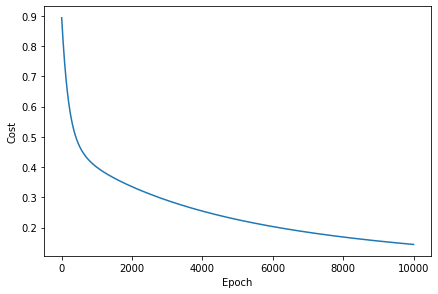

tf.Tensor(1.0, shape=(), dtype=float32)


In [5]:
# Set draw graph
import matplotlib.pyplot as plt
plt.plot(range(1, len(costs) + 1), costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

# Confirm accuracy of model
accuracy_predict=model.predict(x_data,y_data)
print(accuracy_predict)